In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import xgboost as xg
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [29]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


X1 - Relative Compactness: Відносна компактність будівлі.

X2 - Surface Area: Площа поверхні будівлі.

X3 - Wall Area: Площа стін будівлі.

X4 - Roof Area: Площа даху будівлі.

X5 - Overall Height: Загальна висота будівлі.

X6 - Orientation: Орієнтація будівлі.

X7 - Glazing Area: Площа вікон та дверей у будівлі.

X8 - Glazing Area Distribution: Розподіл площі вікон та дверей у будівлі.

Y1 - Heating Load: Показник опалення будівлі.

Y2 - Cooling Load: Показник охолодження будівлі.

In [30]:
df = pd.read_csv('ENB2012_data.csv')
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


There are no empty data and all have a numeric data type

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [32]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [33]:
df.duplicated().value_counts()

False    768
Name: count, dtype: int64

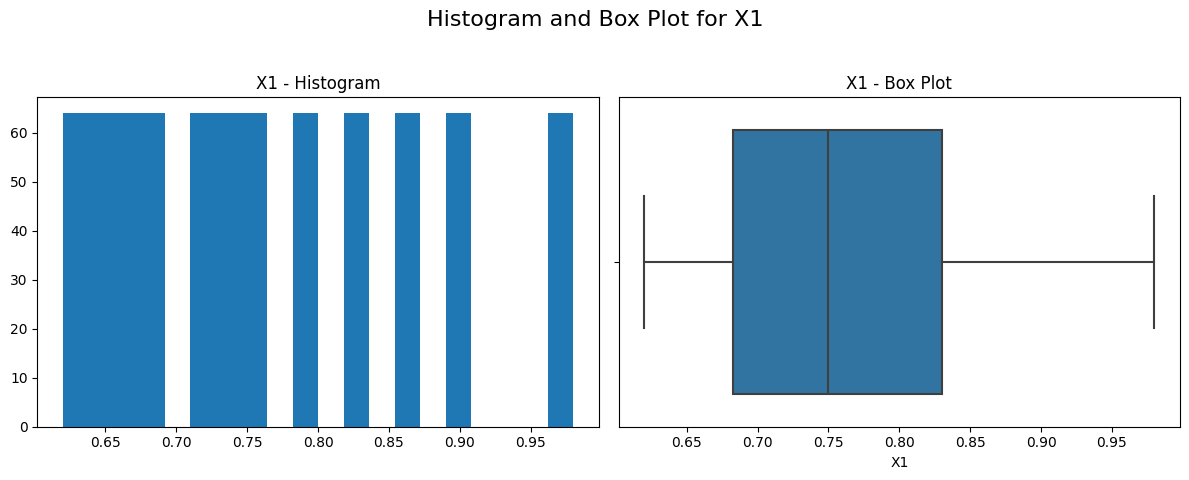

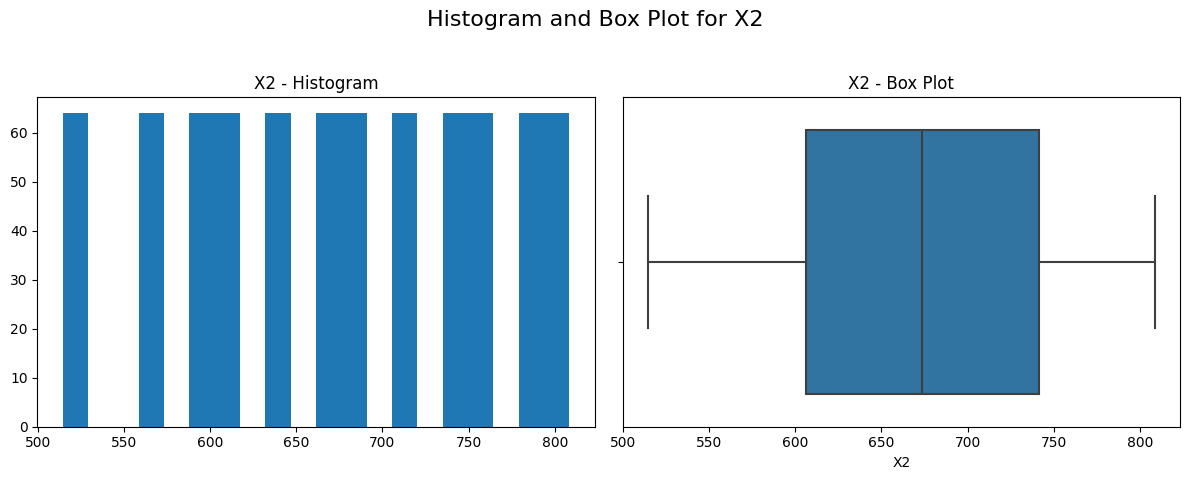

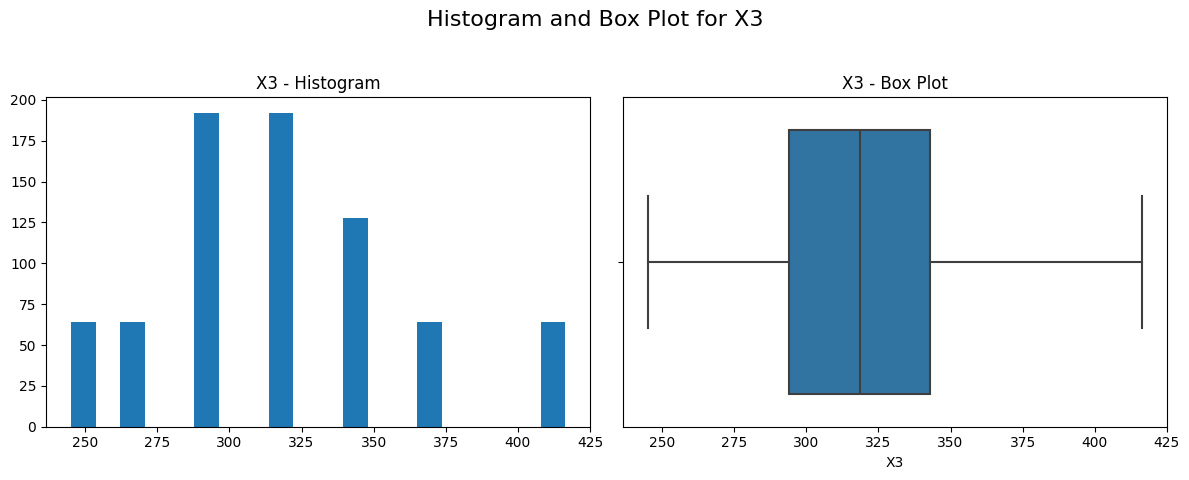

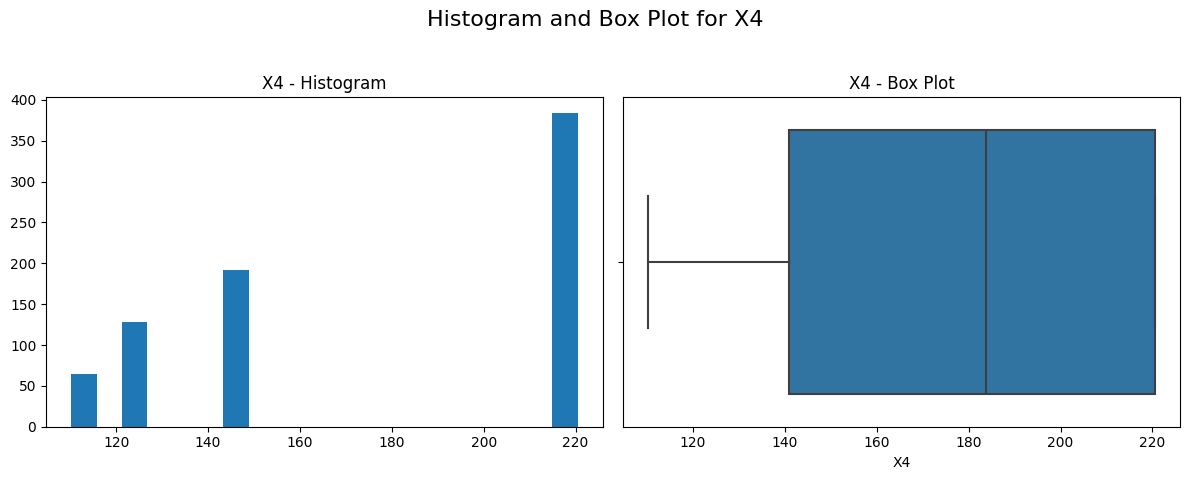

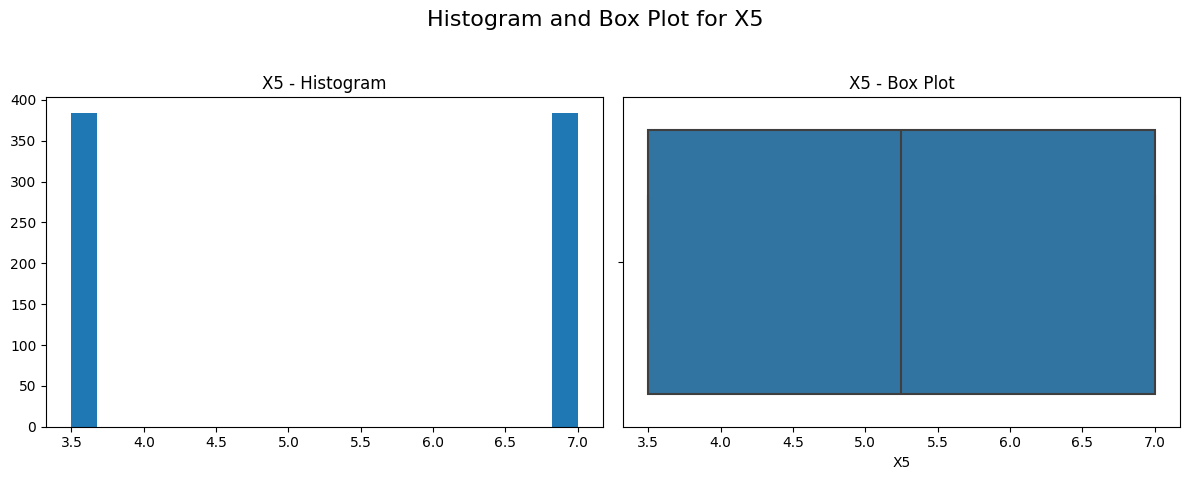

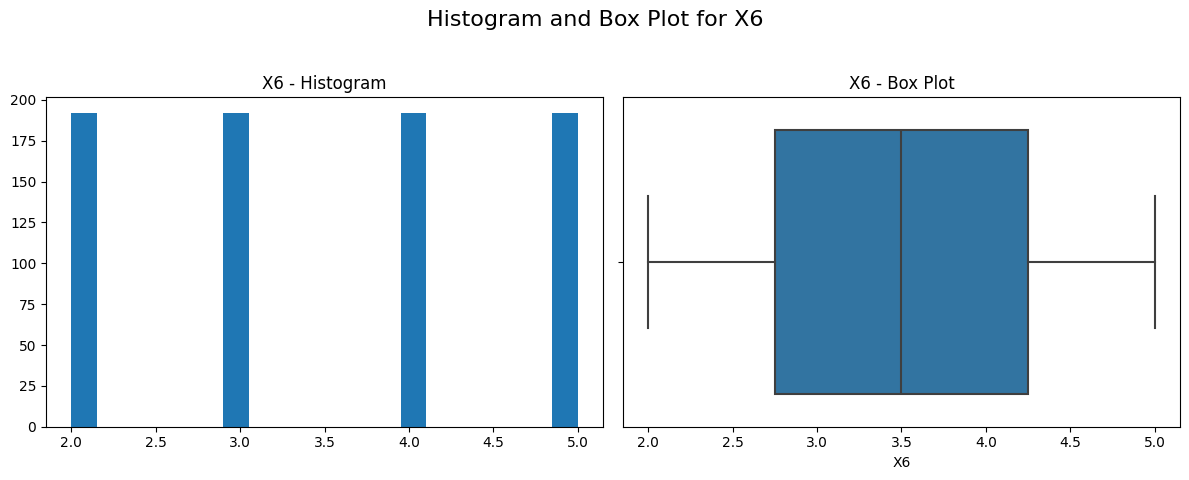

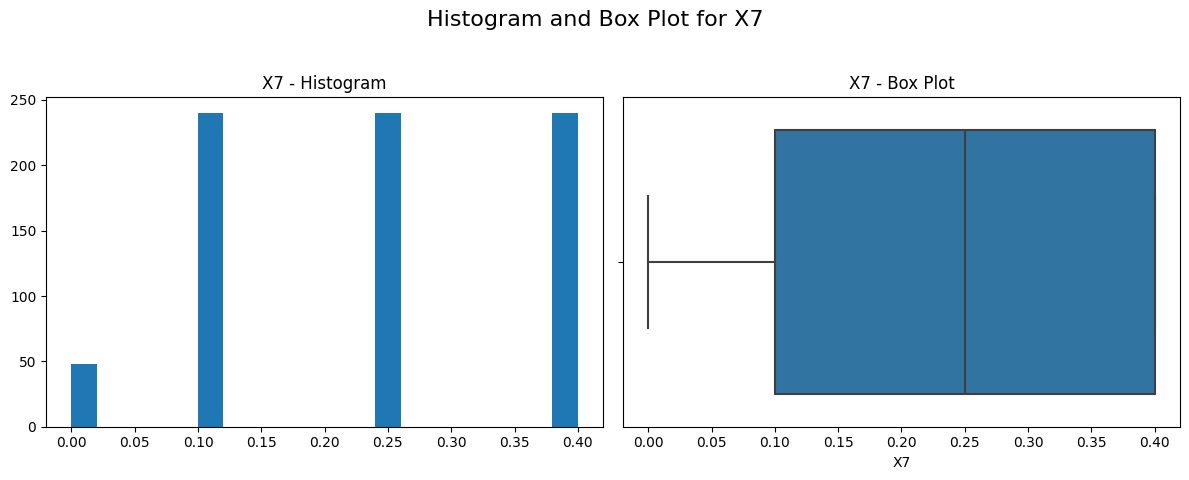

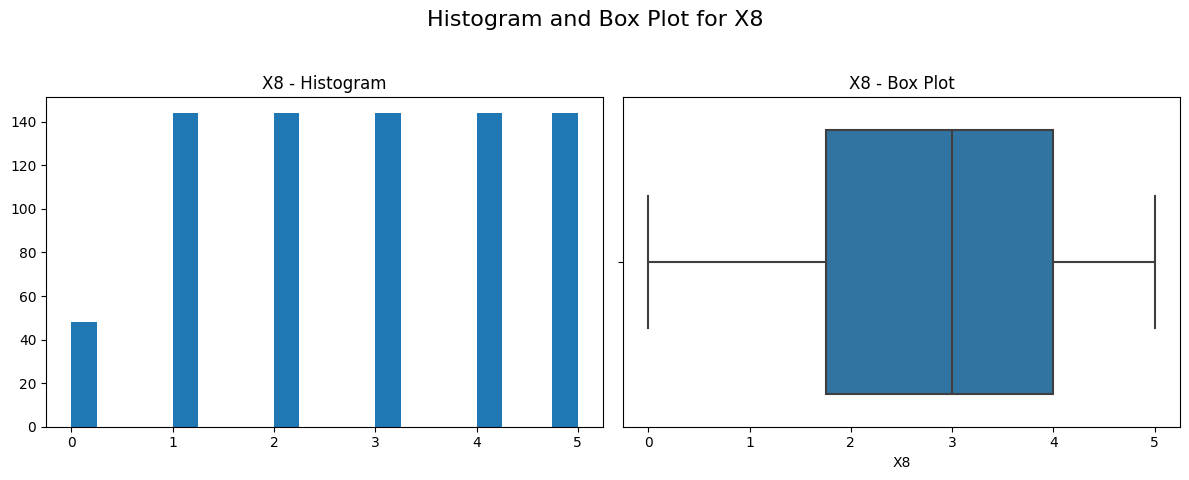

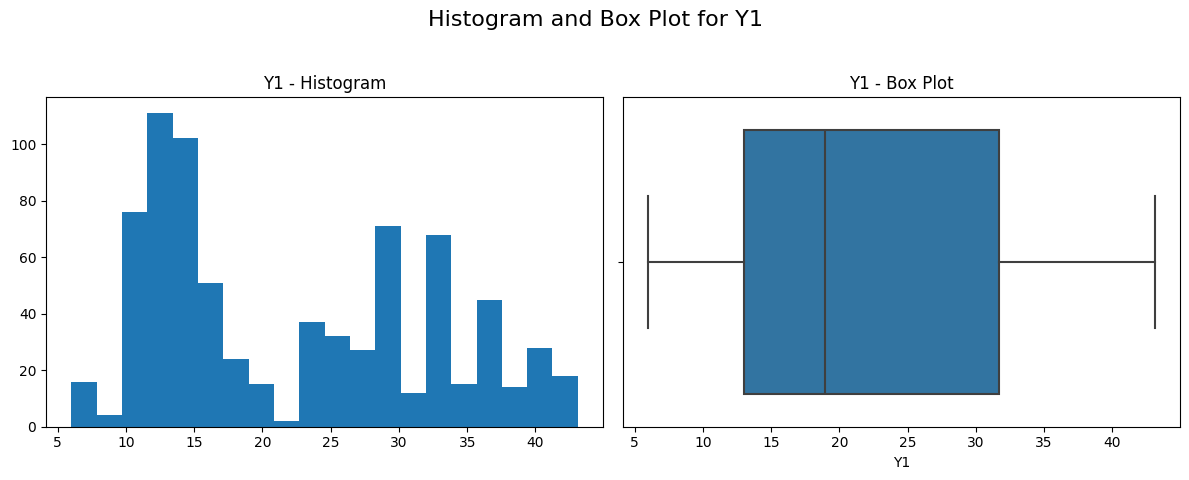

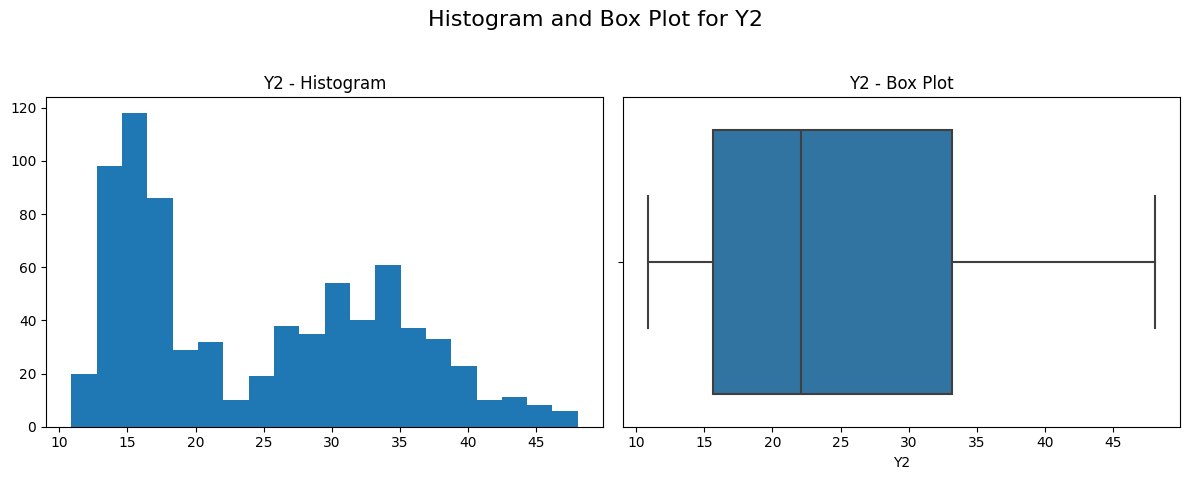

In [34]:
methods = df.columns.tolist()

for method in methods:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'Histogram and Box Plot for {method}', fontsize=16)

    axes[0].hist(df[method], bins=20)
    axes[0].set_title(f'{method} - Histogram')

    sns.boxplot(x=method, data=df, ax=axes[1])
    axes[1].set_title(f'{method} - Box Plot')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [57]:
for column in df.columns:
    value_counts = df[column].value_counts()
    display(f"******************************")
    print(f"Value Counts for column:\n{value_counts}\n")

'******************************'

Value Counts for column:
X1
0.98    64
0.90    64
0.86    64
0.82    64
0.79    64
0.76    64
0.74    64
0.71    64
0.69    64
0.66    64
0.64    64
0.62    64
Name: count, dtype: int64



'******************************'

Value Counts for column:
X2
514.5    64
563.5    64
588.0    64
612.5    64
637.0    64
661.5    64
686.0    64
710.5    64
735.0    64
759.5    64
784.0    64
808.5    64
Name: count, dtype: int64



'******************************'

Value Counts for column:
X3
294.0    192
318.5    192
343.0    128
416.5     64
245.0     64
269.5     64
367.5     64
Name: count, dtype: int64



'******************************'

Value Counts for column:
X4
220.50    384
147.00    192
122.50    128
110.25     64
Name: count, dtype: int64



'******************************'

Value Counts for column:
X5
7.0    384
3.5    384
Name: count, dtype: int64



'******************************'

Value Counts for column:
X6
2    192
3    192
4    192
5    192
Name: count, dtype: int64



'******************************'

Value Counts for column:
X7
0.10    240
0.25    240
0.40    240
0.00     48
Name: count, dtype: int64



'******************************'

Value Counts for column:
X8
1    144
2    144
3    144
4    144
5    144
0     48
Name: count, dtype: int64



'******************************'

Value Counts for column:
Y1
15.16    6
13.00    5
15.55    4
10.68    4
28.15    4
        ..
10.47    1
33.21    1
36.77    1
36.71    1
16.64    1
Name: count, Length: 586, dtype: int64



'******************************'

Value Counts for column:
Y2
21.33    4
29.79    4
14.27    4
17.20    4
14.28    4
        ..
14.65    1
14.54    1
14.39    1
14.46    1
17.11    1
Name: count, Length: 636, dtype: int64



In [36]:
for column in df:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_lower = df[df[column] < lower_bound]
    outliers_upper = df[df[column] > upper_bound]

    display(f"Column '{column}':")
    print(f"Number of outliers (lower outlier): {len(outliers_lower)}")
    print(f"Number of outliers (upper outlier): {len(outliers_upper)}")
    print()

"Column 'X1':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 0



"Column 'X2':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 0



"Column 'X3':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 0



"Column 'X4':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 0



"Column 'X5':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 0



"Column 'X6':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 0



"Column 'X7':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 0



"Column 'X8':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 0



"Column 'Y1':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 0



"Column 'Y2':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 0



It is necessary to check the data for correlation, because if two variables are very highly correlated with each other, there may be a problem of multicollinearity, and it may be useful to include only one of them in the model to avoid unnecessary duplication and improve the interpretation of the model.

In [37]:
corr_matrix = df.corr().round(2)
corr_matrix

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.00,-0.99,-0.20,-0.87,0.83,0.00,-0.00,-0.00,0.62,0.63
X2,-0.99,1.00,0.20,0.88,-0.86,-0.00,0.00,0.00,-0.66,-0.67
X3,-0.20,0.20,1.00,-0.29,0.28,-0.00,-0.00,0.00,0.46,0.43
X4,-0.87,0.88,-0.29,1.00,-0.97,-0.00,-0.00,-0.00,-0.86,-0.86
X5,0.83,-0.86,0.28,-0.97,1.00,0.00,0.00,-0.00,0.89,0.90
X6,0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.01
X7,-0.00,0.00,-0.00,-0.00,0.00,-0.00,1.00,0.21,0.27,0.21
X8,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.21,1.00,0.09,0.05
Y1,0.62,-0.66,0.46,-0.86,0.89,-0.00,0.27,0.09,1.00,0.98
Y2,0.63,-0.67,0.43,-0.86,0.90,0.01,0.21,0.05,0.98,1.00


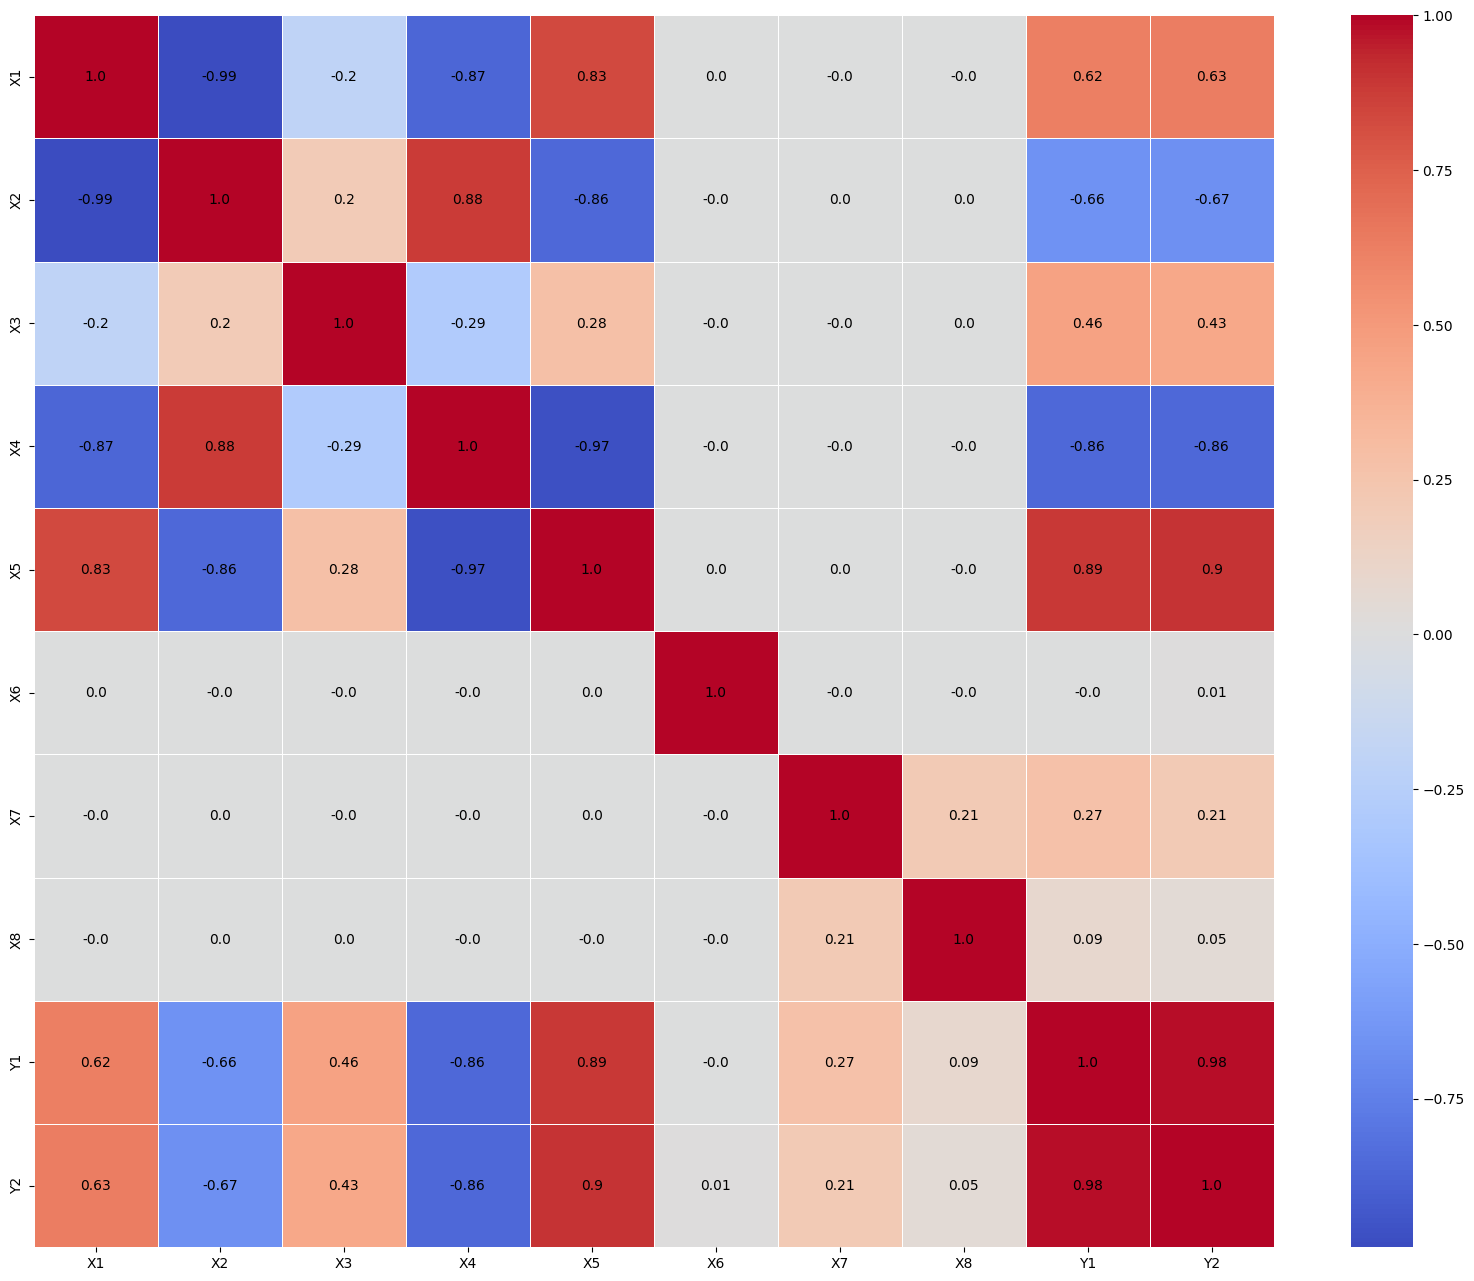

In [38]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = plt.text(j + 0.5, i + 0.5, f"{corr_matrix.iloc[i, j]}",
                        ha='center', va='center', color='black')
plt.show()

x1 - x2 x4 x5

x2 - x4 x5

x4 - x5 y1 y2

x5 - y1 y2

# Linear Regression

In [39]:
X = df.drop(['Y1', 'Y2'], axis=1)  
y = df['Y1']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)  
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Cross-Validation RMSE Scores: [2.93661892 2.92156613 3.02911606 2.8214     2.92412996]
Average RMSE: 2.9265662136473587
Mean Squared Error (MSE): 9.141104034353829
R-squared (R2): 0.9123000276230969


## backward feature elimination

In [40]:
n_features_to_select = 6
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
X_train_rfe = rfe.fit_transform(X_train, y_train)
print("Selected Features:", X.columns[rfe.support_])


Selected Features: Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X7'], dtype='object')


['X1', 'X2', 'X3', 'X4', 'X5', 'X7']

In [41]:
X = df.drop(['Y1', 'Y2', 'X6', 'X8'], axis=1)  
y = df['Y1']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)  
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Cross-Validation RMSE Scores: [2.87985029 2.93636144 3.06310491 2.86861603 2.94293015]
Average RMSE: 2.9381725643162833
Mean Squared Error (MSE): 9.305967622732878
R-squared (R2): 0.9107183223835043


## wall and roof area

In [42]:
df_w_r = df.copy()
df_w_r['Wall_Roof Area'] = df_w_r['X3'] + df_w_r['X4']


In [43]:
X = df_w_r.drop(['Y1', 'Y2', 'X3', 'X4'], axis=1)  
y = df_w_r['Y1']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)  
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Cross-Validation RMSE Scores: [2.93521081 2.92786592 3.02951105 2.82917774 2.92412996]
Average RMSE: 2.9291790953985086
Mean Squared Error (MSE): 9.153187855202736
R-squared (R2): 0.9121840951546911


## Encoding

In [44]:
def encoding(x, df):
    unique_values = df[x].unique()
    for value in unique_values:
        df[f'{x}_{value}'] = (df[x] == value).astype(int)
    df.drop(columns=[x], inplace=True)    

In [45]:
df_X = df.drop(['Y1', 'Y2'], axis=1)

In [46]:
for column in df_X.columns:
    encoding(column, df_X)

In [47]:
df_X

,X1_0.98,X1_0.9,X1_0.86,X1_0.82,X1_0.79,X1_0.76,X1_0.74,X1_0.71,X1_0.69,X1_0.66,...,X7_0.0,X7_0.1,X7_0.25,X7_0.4,X8_0,X8_1,X8_2,X8_3,X8_4,X8_5
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [48]:
X = df_X
y = df['Y1']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)  
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Cross-Validation RMSE Scores: [1.37854472 1.09851809 1.0369433  1.00637611 1.07282964]
Average RMSE: 1.118642373958156
Mean Squared Error (MSE): 1.2197152724228897
R-squared (R2): 0.9882980222851456


In [49]:
X_all = df_X

X_without_X2_X5 = df.drop([ 'X2', 'X5', 'Y1', 'Y2'], axis=1)  
for column in X_without_X2_X5.columns:
    encoding(column, X_without_X2_X5)

X_without_X2 = df.drop([ 'X2', 'Y1', 'Y2'], axis=1)  
for column in X_without_X2.columns:
    encoding(column, X_without_X2)

X_without_X5 = df.drop([ 'X5', 'Y1', 'Y2'], axis=1)  
for column in X_without_X5.columns:
    encoding(column, X_without_X5)

y = df['Y1']  


In [50]:
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)
X_train_without_X2_X5, X_test_without_X2_X5, _, _ = train_test_split(X_without_X2_X5, y, test_size=0.2, random_state=42)
X_train_without_X2, X_test_without_X2, _, _ = train_test_split(X_without_X2, y, test_size=0.2, random_state=42)
X_train_without_X5, X_test_without_X5, _, _ = train_test_split(X_without_X5, y, test_size=0.2, random_state=42)

model_all = LinearRegression()
model_without_X2_X5 = LinearRegression()
model_without_X2 = LinearRegression()
model_without_X5 = LinearRegression()

model_all.fit(X_train_all, y_train)
model_without_X2_X5.fit(X_train_without_X2_X5, y_train)
model_without_X2.fit(X_train_without_X2, y_train)
model_without_X5.fit(X_train_without_X5, y_train)

y_pred_all = model_all.predict(X_test_all)
y_pred_without_X2_X5 = model_without_X2_X5.predict(X_test_without_X2_X5)
y_pred_without_X2 = model_without_X2.predict(X_test_without_X2)
y_pred_without_X5 = model_without_X5.predict(X_test_without_X5)

mse_all = mean_squared_error(y_test, y_pred_all)
mse_without_X2_X5 = mean_squared_error(y_test, y_pred_without_X2_X5)
mse_without_X2 = mean_squared_error(y_test, y_pred_without_X2)
mse_without_X5 = mean_squared_error(y_test, y_pred_without_X5)

r2_all = r2_score(y_test, y_pred_all)
r2_without_X2_X5 = r2_score(y_test, y_pred_without_X2_X5)
r2_without_X2 = r2_score(y_test, y_pred_without_X2)
r2_without_X5 = r2_score(y_test, y_pred_without_X5)

print("Model with all features:")
print(f"Mean Squared Error (MSE): {mse_all}")
print(f"R-squared (R2): {r2_all}")

print("\nModel without X2 and X5:")
print(f"Mean Squared Error (MSE): {mse_without_X2_X5}")
print(f"R-squared (R2): {r2_without_X2_X5}")

print("\nModel without X2:")
print(f"Mean Squared Error (MSE): {mse_without_X2}")
print(f"R-squared (R2): {r2_without_X2}")

print("\nModel without X5:")
print(f"Mean Squared Error (MSE): {mse_without_X5}")
print(f"R-squared (R2): {r2_without_X5}")

Model with all features:
Mean Squared Error (MSE): 1.2197152724228897
R-squared (R2): 0.9882980222851456

Model without X2 and X5:
Mean Squared Error (MSE): 1.1964042816558442
R-squared (R2): 0.9885216684922848

Model without X2:
Mean Squared Error (MSE): 1.1838219079748378
R-squared (R2): 0.9886423840885753

Model without X5:
Mean Squared Error (MSE): 1.2193299107142856
R-squared (R2): 0.9883017194546639


# Other models

In [53]:
X = df_X
y = df['Y1'] 
X

,X1_0.98,X1_0.9,X1_0.86,X1_0.82,X1_0.79,X1_0.76,X1_0.74,X1_0.71,X1_0.69,X1_0.66,...,X7_0.0,X7_0.1,X7_0.25,X7_0.4,X8_0,X8_1,X8_2,X8_3,X8_4,X8_5
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = [DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor()]

for model in models:
    model_name = model.__class__.__name__
    
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"Cross-Validation RMSE Scores for {model_name}:", rmse_scores)
    print(f"Average RMSE for {model_name}:", rmse_scores.mean())
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Mean Squared Error (MSE) for {model_name}: {mse}')
    print(f'R-squared (R2) for {model_name}: {r2}')
    print()


Cross-Validation RMSE Scores for DecisionTreeRegressor: [0.58480836 0.62813118 0.57823955 0.57220441 0.67507741]
Average RMSE for DecisionTreeRegressor: 0.6076921807732141
Mean Squared Error (MSE) for DecisionTreeRegressor: 0.4641246753246755
R-squared (R2) for DecisionTreeRegressor: 0.9955471766810178

Cross-Validation RMSE Scores for RandomForestRegressor: [0.469198   0.532074   0.72582232 0.48804966 0.5127535 ]
Average RMSE for RandomForestRegressor: 0.5455794951614635
Mean Squared Error (MSE) for RandomForestRegressor: 0.29947816701298396
R-squared (R2) for RandomForestRegressor: 0.9971267992492133

Cross-Validation RMSE Scores for XGBRegressor: [0.38833702 0.39864779 0.36681864 0.35408629 0.43156553]
Average RMSE for XGBRegressor: 0.3878910549823896
Mean Squared Error (MSE) for XGBRegressor: 0.1622026431183305
R-squared (R2) for XGBRegressor: 0.9984438239333588

